In [1]:
from sklearn.datasets import load_digits

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

import os
import warnings
warnings.filterwarnings("ignore")

In [46]:
mnist=load_digits()

In [59]:
type(mnist)

sklearn.utils.Bunch

In [60]:
X, y = mnist["data"], mnist["target"]
X.shape

(1797, 64)

In [61]:
y.shape

(1797,)

In [48]:
df=pd.DataFrame(mnist.data)

In [49]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [50]:
target=pd.DataFrame(mnist.target)

In [51]:
target.head()

,0
0,0
1,1
2,2
3,3
4,4


In [52]:
target['label']=target[0]

In [53]:
target.head()

,0,label
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [54]:
target.drop(columns=0, inplace=True)

In [62]:
df.shape

(1797, 65)

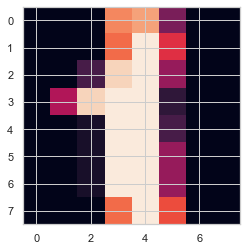

In [65]:
plt.imshow(mnist.images[1])
plt.show()

In [69]:
import matplotlib as mpl
import matplotlib.pyplot as plt

(-0.5, 7.5, 7.5, -0.5)

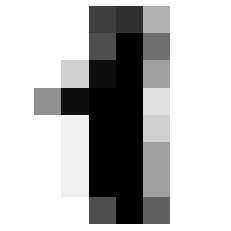

In [72]:
digit=X[1]

digit_img=digit.reshape(8,8)
plt.imshow(digit_img, cmap=plt.cm.binary)

plt.axis('off')



In [73]:
y[1]

1

In [57]:
df=pd.concat([df,target], axis=1)

In [74]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [75]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# Notice to prevent data leakage from the test set, we only fit our scaler to the training set
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
from sklearn.svm import SVC

In [78]:
model = SVC()

In [79]:
model.fit(X_train,y_train)

SVC()

In [80]:
predictions = model.predict(X_test)

In [81]:
from sklearn.metrics import classification_report,confusion_matrix

In [82]:
print(confusion_matrix(y_test,predictions))

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  1  0  1  0 38]]


In [83]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       0.99      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [90]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")

array([0.99305556, 0.98611111, 0.98611111, 0.97916667, 0.98611111,
       0.98611111, 1.        , 0.99300699, 0.97902098, 1.        ])

## Binary Classifier

In [95]:
y_train_7=(y_train ==7)

y_test_7 = (y_test ==7)

In [96]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_7)

SGDClassifier(random_state=42)

In [97]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_7, cv=3, scoring="accuracy")

array([0.98121086, 0.98329854, 0.97286013])

In [98]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_7, cv=3)

In [99]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_7, y_train_pred)

array([[1266,   26],
       [   4,  141]])

In [100]:
print(classification_report(y_train_7, y_train_pred))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99      1292
        True       0.84      0.97      0.90       145

    accuracy                           0.98      1437
   macro avg       0.92      0.98      0.95      1437
weighted avg       0.98      0.98      0.98      1437



In [110]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50)

rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [111]:
predictions = rfc.predict(X_test)

In [112]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.90      0.95        30
           9       0.95      0.97      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360

